## Multi-arm bandit

In [64]:
from __future__ import division 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plot

from bandits import Bandits
from hecf import BanditStrategy, max_mean, random_choice, epsilon_greedy, softmax, ucb1, bayesian_bandit, regret


% matplotlib inline
% autoreload 2


In [71]:
def run_of_functions(bandit_list, function, num_trials):
    bandits = Bandits(bandit_list)
    strategy = BanditStrategy(bandits, function)
    strategy.sample_bandits(num_trials)
    strategy.plot_optimal_bandit()
    print 'The strategy is:', function
    print 'Number of wins:{}, Number of trials:{}'.format(strategy.wins, strategy.trials)
    print 'Convertion Rate:', strategy.wins / strategy.trials
    print '***A total of {} wins of {} trials***'.format(strategy.wins.sum(), strategy.trials.sum())
    
    

Slot machines (bandits): [0.05, 0.03, 0.06]
The strategy is: <function random_choice at 0x108dbc500>
Number of wins:[ 20.  11.  19.], Number of trials:[ 317.  359.  324.]
Convertion Rate: [ 0.06309148  0.03064067  0.05864198]
***A total of 50.0 wins of 1000.0 trials***
The strategy is: <function max_mean at 0x108dbcde8>
Number of wins:[  0.  36.   0.], Number of trials:[   3.  996.    1.]
Convertion Rate: [ 0.          0.03614458  0.        ]
***A total of 36.0 wins of 1000.0 trials***
The strategy is: <function epsilon_greedy at 0x108dbc050>
Number of wins:[ 56.   2.   2.], Number of trials:[ 925.   44.   31.]
Convertion Rate: [ 0.06054054  0.04545455  0.06451613]
***A total of 60.0 wins of 1000.0 trials***
The strategy is: <function softmax at 0x108dbccf8>
Number of wins:[ 53.   0.   0.], Number of trials:[ 934.   27.   39.]
Convertion Rate: [ 0.05674518  0.          0.        ]
***A total of 53.0 wins of 1000.0 trials***
The strategy is: <function ucb1 at 0x108dbc140>
Number of wins

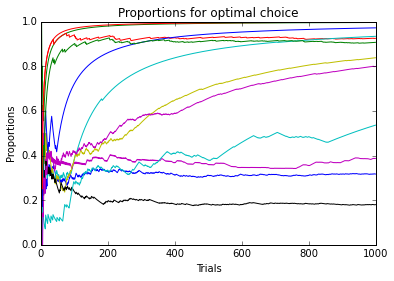

In [74]:
function_list = [random_choice, max_mean, epsilon_greedy, softmax, ucb1, bayesian_bandit]
bandit_list_l = [[0.05, 0.03, 0.06], [0.1, 0.2, 0.3, 0.4, 0.5]]

for bandit in bandit_list_l:
    print '=============================='
    print 'Slot machines (bandits):', bandit
    print '=============================='
    for funct in function_list:
        run_of_functions(bandit, funct, 1000)

In [75]:
# function_list = [random_choice, max_mean, epsilon_greedy, softmax, ucb1, bayesian_bandit]
# bandit_list_l = [[0.05, 0.03, 0.06],[0.1, 0.1, 0.1, 0.1, 0.9],[0.1, 0.1, 0.1, 0.1, 0.12], [0.1, 0.2, 0.3, 0.4, 0.5]]

# for bandit in bandit_list_l:
#     print '=============================='
#     print 'Slot machines (bandits):', bandit
#     print '=============================='
#     for funct in function_list:
#         run_of_functions(bandit, funct, 1000)

In [89]:
def check_paren(string):
    check = True
    if string.count('(') != string.count(')'):
        check = False
    if string.count('[') != string.count(']'):
        check = False
    if string.count('{') != string.count('}'):
        check = False

    return check

In [90]:
check_paren('(a(b))()()')

True

In [92]:
check_paren('a(b())')

True

In [94]:
check_paren(')a(b))')

False

In [95]:
check_paren('(a(b){c}')

False

In [123]:
def evaluating(string):
    if string.count('(') != string.count(')'):
        return False, 'No match found'
    elif string.count('[') != string.count(']'):
        return False, 'No match found'
    elif string.count('{') != string.count('}'):
        return False, 'No match found'
    else:
        return True, 'OK'
    
    

In [186]:
def evaluate(string):
    if string.count('(') != string.count(')'):
        return False, "No match found for '(':{}, ')':{}".format(string.count('('),string.count(')'))
    elif string.count('[') != string.count(']'):
        return False, "No match found for '[': {}, ']':{}".format(string.count('['), string.count(']'))
    elif string.count('{') != string.count('}'):
        return False, "No match found for '{':{}, '}':{}".format(string.count('{}'), string.count('}'))
    else:
        return True, 'OK'
    

In [187]:
evaluate('(a(b))()()') 

(True, 'OK')

In [188]:
evaluate('a(b())')

(True, 'OK')

In [189]:
evaluate(')a(b))')

(False, "No match found for '(':1, ')':3")

In [190]:
evaluate('(a(b){c}')

(False, "No match found for '(':2, ')':1")

In [191]:
evaluate('a(b))))')

(False, "No match found for '(':1, ')':4")

In [192]:
evaluate('(((a(b){c}')

(False, "No match found for '(':4, ')':1")